In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
starbucks = pd.read_csv("clean_starbucks.csv")

In [3]:
starbucks

,product_name,size,milk,whip,serv_size_m_l,calories,total_fat_g,saturated_fat_g,trans_fat_g,cholesterol_mg,sodium_mg,total_carbs_g,fiber_g,sugar_g,caffeine_mg,Category
0,brewed coffee - dark roast,short,0,0,236,3,0.1,0.0,0.0,0,5,0,0,0,130,coffee
1,brewed coffee - dark roast,tall,0,0,354,4,0.1,0.0,0.0,0,10,0,0,0,193,coffee
2,brewed coffee - dark roast,grande,0,0,473,5,0.1,0.0,0.0,0,10,0,0,0,260,coffee
3,brewed coffee - dark roast,venti,0,0,591,5,0.1,0.0,0.0,0,10,0,0,0,340,coffee
4,brewed coffee - decaf pike place roast,short,0,0,236,3,0.1,0.0,0.0,0,5,0,0,0,15,coffee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,White Hot Chocolate,venti,4,0,591,450,17.0,15.0,0.0,5,310,71,0,69,0,chocolate
1143,White Hot Chocolate,venti,4,1,591,520,24.0,20.0,0.2,30,320,73,0,71,0,chocolate
1144,Protein & Fibre Powder,1 scoop,0,0,0,30,0.1,0.1,0.0,0,45,1,1,0,0,other
1145,Matcha Green Tea Powder,1 scoop,0,0,0,25,0.1,0.0,0.0,0,0,6,0,5,25,tea


In [4]:
z = starbucks.Category
product_names = starbucks.product_name
sizes = starbucks.size

# On enlève la catégories et les variables qualitatives
starbucks.drop(columns=["Category", "product_name", "size"], inplace=True)



In [5]:
starbucks.drop(columns=["milk", "whip"], inplace=True)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from utils.knn_validation import knn_multiple_validation

# on veut trouver le nombre de voisins le plus optimisé, pour cela on utilise la validation multiple
train_size = 0.9
n_splits = 10
gen = knn_multiple_validation(starbucks, z, n_splits, train_size, np.arange(1,100,1))

df = pd.DataFrame(gen, columns=["nbr_neighbors", "accuracy", "degre_liberte"])
df

# Cepandant la validation multiple peut avoir des bias en sur ou sous représentant des exemples

,nbr_neighbors,accuracy,degre_liberte
0,1,0.930435,1032.000000
1,2,0.921739,516.000000
2,3,0.904348,344.000000
3,4,0.895652,258.000000
4,5,0.869565,206.400000
...,...,...,...
985,95,0.721739,10.863158
986,96,0.713043,10.750000
987,97,0.704348,10.639175
988,98,0.695652,10.530612


In [7]:
Kopt = df.groupby("nbr_neighbors").mean().accuracy.idxmax()
Kopt

1

<Axes: xlabel='degre_liberte', ylabel='accuracy'>

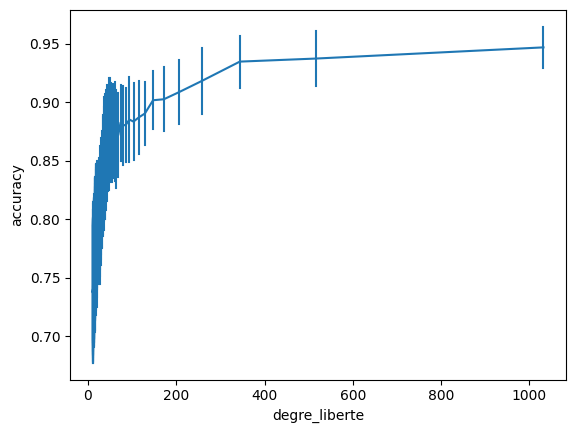

In [8]:
sns.lineplot(x="degre_liberte", y="accuracy", err_style='bars', errorbar="sd", data=df)

<Axes: xlabel='nbr_neighbors', ylabel='accuracy'>

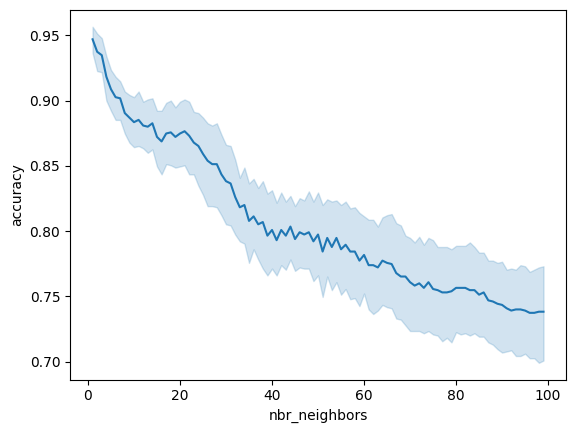

In [9]:
sns.lineplot(x="nbr_neighbors", y="accuracy", data=df)

1

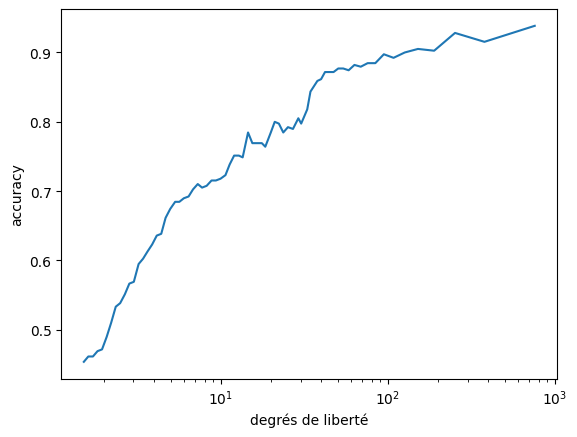

In [10]:
# Simple Validation
from utils.knn_validation import knn_simple_validation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(starbucks, z, train_size=0.66)
n_neighbors_list = np.unique(np.round(np.geomspace(1, 500,100)).astype(int))
gen = knn_simple_validation(X_train, y_train, X_val, y_val,n_neighbors_list)
df = pd.DataFrame(gen, columns=["# neighbors", "accuracy", "degrés de liberté"])

sp = sns.lineplot(x="degrés de liberté", y="accuracy", data=df)
sp.set(xscale="log")

Kopt = df.groupby("# neighbors").mean().accuracy.idxmax()
Kopt

1

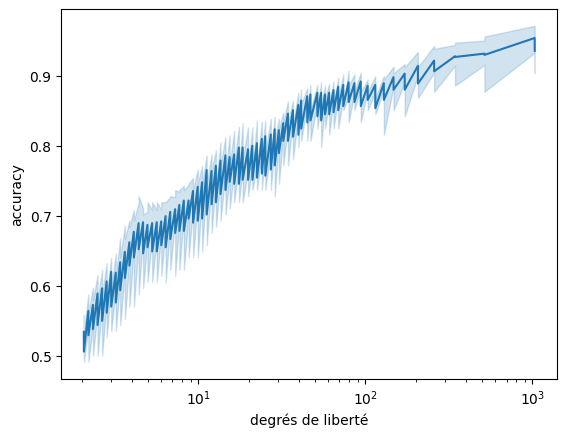

In [11]:
# Cross Validation
from utils.knn_cross_validation import knn_cross_validation
n_folds = 10
gen = knn_cross_validation(starbucks, z, n_folds, n_neighbors_list)
df_cross = pd.DataFrame(gen, columns=["# neighbors", "accuracy", "degrés de liberté"])
sp = sns.lineplot(x="degrés de liberté", y="accuracy", data=df_cross)
sp.set(xscale="log")
Kopt = df_cross.groupby("# neighbors").mean().accuracy.idxmax()
Kopt

/tmp/ipykernel_4532/2059632063.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sp = sns.lineplot(x="degrés de liberté", y="accuracy", err_style="bars", ci="sd", data=df)


1

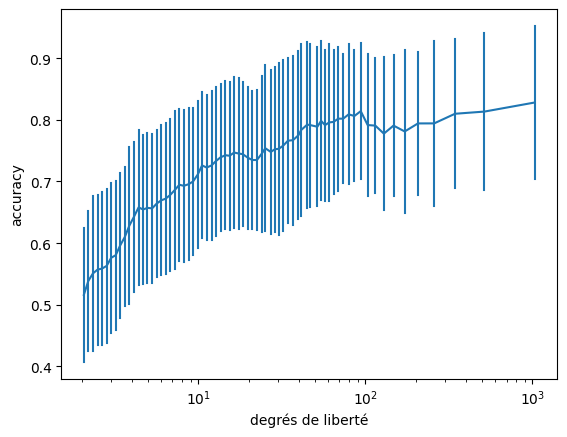

In [16]:
from sklearn.model_selection import cross_val_score
from utils.knn_cross_validation import knn_cross_validation2
n_folds = 10
gen = knn_cross_validation2(starbucks, z, n_folds, n_neighbors_list)
df = pd.DataFrame(gen, columns=["# neighbors", "accuracy", "degrés de liberté"])

sp = sns.lineplot(x="degrés de liberté", y="accuracy", err_style="bars", ci="sd", data=df)
sp.set(xscale="log")

Kopt = df.groupby("# neighbors").mean().accuracy.idxmax()
Kopt

In [39]:
# On part avec k = 1
X_train, X_test, z_train, z_test = train_test_split(starbucks, z, test_size=0.33, random_state=42)

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, z_train)

z_pred = knn.predict(X_test)

z_comp = pd.DataFrame({"Prediction": z_pred, "Realite": z_test})

from sklearn.metrics import accuracy_score
print(f"Précision: {accuracy_score(z_pred, z_test)}")

z_failed = z_comp.loc[z_comp["Prediction"] != z_comp["Realite"]]
print(f"Nombre de prédiction ratées: {len(z_failed)}")
z_failed

Précision: 0.9234828496042217
Nombre de prédiction ratées: 29


,Prediction,Realite
561,other,tea
464,coffee,tea
650,other,tea
792,coffee,frappuccino
652,other,tea
903,chocolate,frappuccino
736,coffee,frappuccino
1101,frappuccino,chocolate
541,coffee,tea
850,coffee,frappuccino
